In [1]:
# The first plot shows how the poverty percentage varies based on the two education index
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.set_context("poster")
plt.scatter(df_temp['education_index'],df_temp['poverty_percentage'],color='blue')#,alpha=0.5)
x=np.array([0,100])
slope, intercept = np.polyfit(df_temp['education_index'],df_temp['poverty_percentage'],1)
plt.plot(x,slope*x+intercept,color='green')
plt.xlabel('education index')
plt.ylabel('poverty percentage')
plt.title('poverty percentage vs. education index and the least square fitting line')
plt.axis([0,100,0,50])
#plt.annotate('slope='+str(round(slope,2))+'\nintercept='+str(round(intercept,2)),xy=(80,30),xytext=(80,27))
plt.text(80,27,'slope='+str(round(slope,2))+'\nintercept='+str(round(intercept,2)),fontsize = 20)
plt.show()
#sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df1,markers='.')

correlation_df1=df_temp.loc[:,['poverty_percentage','education_index']].corr()
cor_coef_eduidx_pov = correlation_df1.iloc[0,1]
print('Correlation coefficient between education index and poverty is ',cor_coef_eduidx_pov)

# The second plot shows the heat map
#plt.figure(figsize=(6,3))
#sns.heatmap(correlation_df1,annot=True,cmap='PuRd')
#plt.title('heatmap between poverty percentage and education index')
#plt.show()

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


NameError: name 'df_temp' is not defined

## Conclusion 1: Lower education results in higher poverty

In [42]:
# The second plot shows more specifically the relationship between poverty and all four education levels
correlation_df2=df_extended.iloc[:,[7,3,4,5,6]].corr()
print('Correlation coefficient between poverty and less than high school diploma is ',correlation_df2.iloc[0,1])
print('Correlation coefficient between poverty and high school diploma is ',correlation_df2.iloc[0,2])
print('Correlation coefficient between poverty and high associate degree is ',correlation_df2.iloc[0,3])
print('Correlation coefficient between poverty and Bachelor\'s or higher degree is ',correlation_df2.iloc[0,4])
#plt.figure(figsize=(10,7))
#sns.heatmap(correlation_df2,annot=True)
#plt.show()

Correlation coefficient between poverty and less than high school diploma is  0.6873160780378892
Correlation coefficient between poverty and high school diploma is  0.24186205016589743
Correlation coefficient between poverty and high associate degree is  -0.35339461749736933
Correlation coefficient between poverty and Bachelor's or higher degree is  -0.482226645538893


###### The coefficients show that having a high school diploma significantly helps reducing the poverty compared to not having it because the coefficient drops from 0.69 to 0.24. Higher percentage of population with some college associate or degree also strongly improves the poverty when compared to the impact of high school diploma (The coefficient drops from 0.24 to -0.35). On the other hand, there is not a big difference between the effect of having some associate/college degree and bachelors/higher degree on reducing poverty because the coefficient is improved only by 0.12 (it drops from -0.35 to -0.48).


## Conclusion 2: Gaining high school diploma or some associate/college degree improves the poverty more than gaining a bachelor's or higher degree does

In [43]:
### Ignore this section
# Rural-urban-continuum-code and its relationship with poverty and education
#new_df3 = df.groupby('rural_urban_continuum_code').mean()
#new_df3.iloc[:,0:4].plot.bar(stacked=True)
#plt.legend(bbox_to_anchor=(1,1), loc='upper left')
#plt.show()
#plt.close()
#sns.boxplot(x='rural_urban_continuum_code',y='poverty_percentage',data=df)
#plt.show()
#plt.figure(figsize=[5,3])
#correlation_df3=df_extended.iloc[:,[7,2]].corr()
#sns.heatmap(correlation_df3,annot=True)
#plt.show()

C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\moein\Miniconda3\envs\mypy36\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


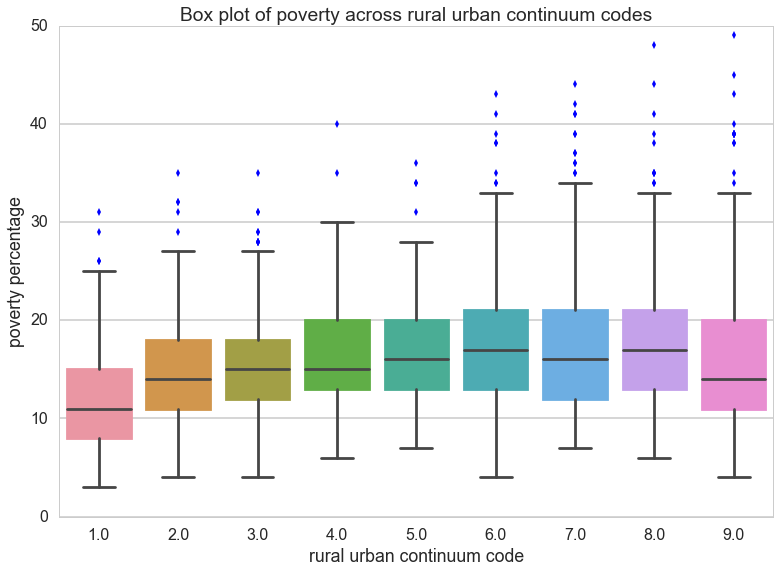

Correlation coefficient between poverty and RUCC is  0.24205906681738273


In [44]:
# Rural-urban-continuum-code and its relationship with poverty
df_sorted = df.sort('rural_urban_continuum_code')
sns.boxplot(x='rural_urban_continuum_code',y='poverty_percentage',data=df_sorted)
plt.xlabel('rural urban continuum code')
plt.ylabel('poverty percentage')
plt.title('Box plot of poverty across rural urban continuum codes')
plt.show()

correlation_df3=df.loc[:,['poverty_percentage','rural_urban_continuum_code']].corr()
print('Correlation coefficient between poverty and RUCC is ',correlation_df3.iloc[0,1])
#plt.figure(figsize=[5,3])
#sns.heatmap(correlation_df3,annot=True,yticklabels=['poverty_percentage','rucc'],xticklabels=['poverty_percentage','rucc'])
#plt.show()

#### Since the correlation between RUCC and poverty percentage is not too high, the correlation could exist by chance. Therefore, I run a hypothesis test
null hypothesis: There is no correlation between poverty percentage and RUCC

alternate hypothesis: There is a positive correlation between poverty percentage and RUCC

In [45]:
np.random.seed(132)
def draw_perm_corr(x,y,size=1):
    reps = np.empty(size)
    for i in range(size):
        x_perm = np.random.permutation(x)
        reps[i] = np.corrcoef(x_perm,y)[0,1]
    return reps
x=df_extended['poverty_percentage']
y=df_extended['rural_urban_continuum_code']
size = 1000
corr_reps = draw_perm_corr(x,y,size)
p = np.sum(corr_reps>=0.24)/len(corr_reps)
print('The probability of having a correlation of as small as 0.24 between RUCC and poverty is ',p)

The probability of having a correlation of as small as 0.24 between RUCC and poverty is  0.0


## Conclusion 3: There is positive correlation between RUCC and poverty

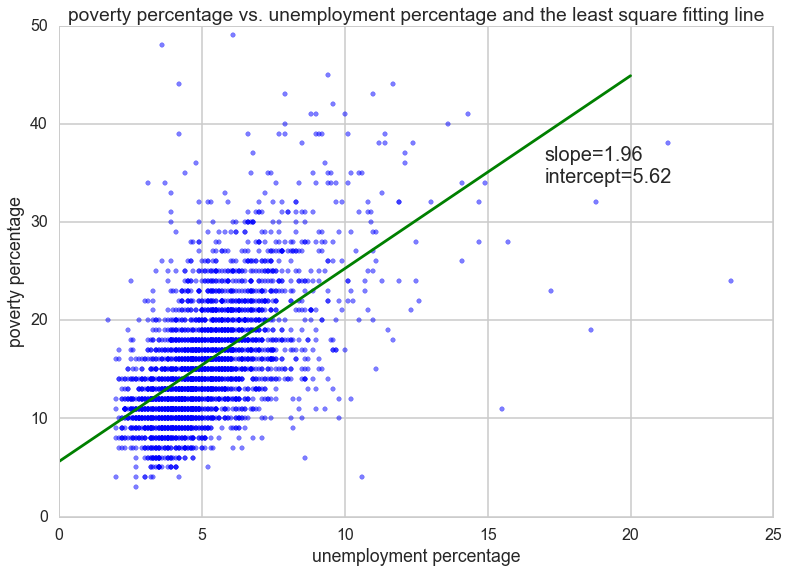

Correlation coefficient between poverty and unemployment is  0.590693806927391


In [46]:
# it is helpful to take a look at the pair plot of unemployment and poverty
plt.scatter(df['unemployment_rate'],df['poverty_percentage'],color='blue',alpha=0.5)
x=np.array([0,20])
slope, intercept = np.polyfit(df['unemployment_rate'],df['poverty_percentage'],1)
plt.plot(x,slope*x+intercept,color='green')
plt.axis([0,25,0,50])
plt.text(17,34,'slope='+str(round(slope,2))+'\nintercept='+str(round(intercept,2)),fontsize = 20)
plt.xlabel('unemployment percentage')
plt.ylabel('poverty percentage')
plt.title('poverty percentage vs. unemployment percentage and the least square fitting line')
#plt.annotate('slope='+str(round(slope,2))+'\nintercept='+str(round(intercept,2)),xy=(17.5,40),xytext=(17,34.5))
plt.show()
#sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df1,markers='.')

correlation_df4=df.loc[:,['poverty_percentage','unemployment_rate']].corr()
print('Correlation coefficient between poverty and unemployment is ',correlation_df4.iloc[0,1])
# The second plot shows the heat map
#plt.figure(figsize=(5,3))
#sns.heatmap(correlation_df5,annot=True)
#plt.show()

## Conclusion 4: Higher unemployment results in higher poverty

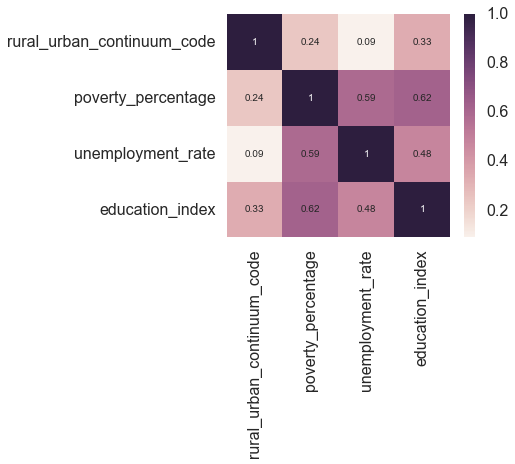

In [47]:
# At the end, I am investigating the correlation between education, unemployment, RUCC and poverty.
correlation_df5=df_extended.iloc[:,[2,7,9,10]].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_df5,annot=True)
plt.show()

### Conclusion 5: There is strong correlation between poverty, unemployment, and low education. They are correlated to RUCC as well.